In [123]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [124]:
# Генерация выборки логистического распределения с заданными параметрами
scale, N = 2, 10000
sample = np.random.rayleigh(scale, N)


num_bins = 100
hist, bin_edges = np.histogram(sample, bins=num_bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


#здесь была проблема (в передаче данных в аргументах)
pdf_values = stats.rayleigh.pdf(bin_centers, loc = 0, scale = 2)

# Вычисляем ожидаемые частоты для каждого интервала
expected_frequencies = pdf_values * (bin_edges[1] - bin_edges[0]) * N
observed_frequencies = hist * (bin_edges[1] - bin_edges[0]) * N

"""
При density=True в hist хранятся значения плотности вероятности (в каждом интервале)
При density=False в hist хранятся абсолютные частоты  (в каждом интервале)
Так как для расчета хи квадрат нужны абсолютные частоты мы домножаем на
(bin_edges[1] - bin_edges[0]) - ширину интервала
(нормализация гистограммы)

"""

"""
plt.figure(figsize=(10,15))
plt.plot(hist)

plt.figure(figsize=(10,15))
plt.plot(expected_frequencies)

plt.figure(figsize=(10,15))
plt.plot(pdf_values)

"""
"""
print(np.sort(hist))
print("----")
print(expected_frequencies)
print("----")
print(pdf_values)
"""


# Расчет статистики Хи-квадрат
chi_square_statistic = ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()

# 1.3 Определение критических значений для уровней значимости 0.1, 0.05, 0.01
alpha_levels = [0.1, 0.05, 0.01]
critical_values = [stats.chi2.ppf(1 - alpha, df=num_bins-1-1) for alpha in alpha_levels]

chi_square_statistic, critical_values

(82.01051584674705,
 [116.31529838274676, 122.10773460981942, 133.47567232298493])

---
---
---

1.2. Расчет статистики для критерия Хи-квадрат Пирсона Значение статистики Хи-квадрат Пирсона составило 82.01051584674705.

1.3. Критические значения для уровней значимости Для различных уровней значимости критические значения следующие:

При уровне значимости 0.1: 116.31529838274676

При уровне значимости 0.05: 122.10773460981942

При уровне значимости 0.01: 133.47567232298493

1.4. Сравнение статистики с критическими значениями Значение статистики (82.01051584674705) не превышает критические значения для всех уровней значимости (0.1, 0.05, и 0.01), что указывает на то, что гипотеза о соответствии распределения выборки логистическому закону распределения на данном уровне значимости принимается.



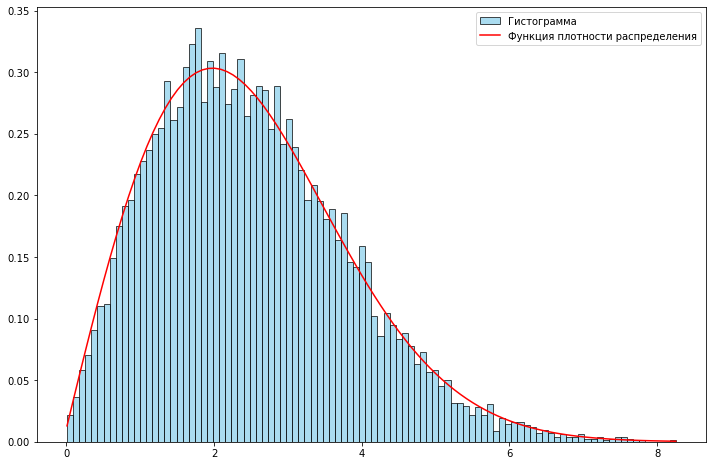

In [125]:
fig = plt.figure()

fig.set_size_inches((12, 8))

plt.hist(sample, bins=num_bins, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Гистограмма')

x = np.linspace(min(sample), max(sample), num_bins)

plt.plot(x, pdf_values, label='Функция плотности распределения', color='r')
plt.legend()
plt.show()

0.0073101260414698555 {0.1: 0.012238478702170826, 0.05: 0.013580986393225504, 0.01: 0.016276236115189503} 

KstestResult(statistic=0.0073101260414698555, pvalue=0.6563806400284462)


((array([0.0117741 , 0.01834437, 0.0231636 , ..., 4.05552159, 4.16895577,
         4.3765027 ]),
  array([0.01055388, 0.03310924, 0.03919586, ..., 7.75026701, 7.77426543,
         8.25073112])),
 (1.980352889828283, 0.01237752682137927, 0.9999349433260588))

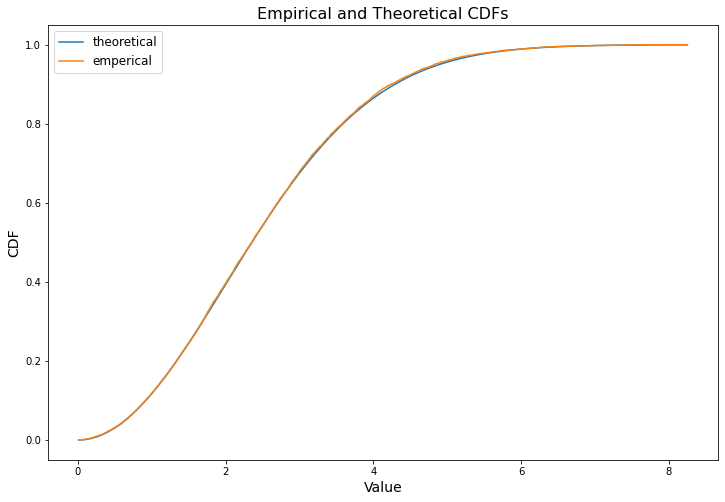

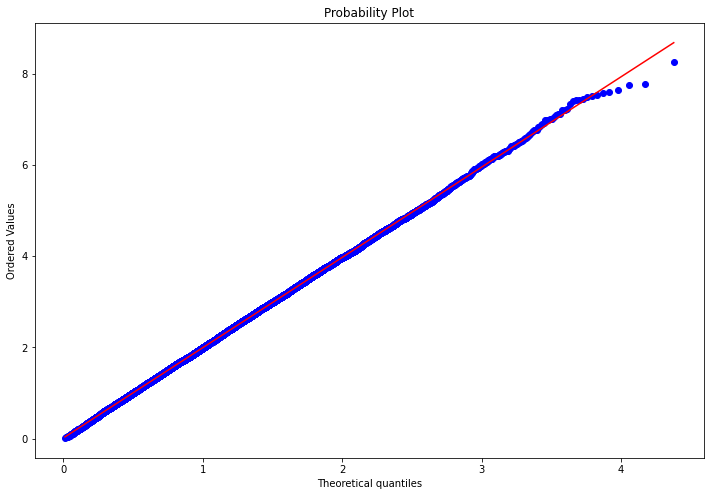

In [126]:
"""
empirical_cdf_values представляет собой массив, 
где каждый элемент отражает эмпирическую вероятность того, что 
случайная величина не превысит соответствующего значения из отсортированной
выборки. Это позволяет нам оценить, как распределены данные в выборке 
относительно вероятности их значения в рамках всего набора данных.
"""

sorted_sample = np.sort(sample)
theoretical_cdf_values = stats.rayleigh.cdf(sorted_sample, loc = 0, scale=2)
empirical_cdf_values = np.arange(1, N + 1) / N


#Cumulative distribution function - функция распределения 
#supremum of distance between emperical_cdf and theoretical_cdf
kolmogorov_statistic = np.max(np.abs(empirical_cdf_values - theoretical_cdf_values))


# Для критерия Колмогорова критические значения зависят от размера выборки и уровня значимости
# Используем приближенную формулу для больших выборок
alpha_levels = [0.1, 0.05, 0.01]
kolmogorov_critical_values = {alpha: stats.kstwobign.ppf(1 - alpha) / np.sqrt(N) for alpha in alpha_levels}



print(kolmogorov_statistic, kolmogorov_critical_values, '\n')
print(stats.kstest(sample, 'rayleigh', args=(0,2)))


fig = plt.figure()
fig.set_size_inches((12, 8))

#  теоретическая
cdf = stats.rayleigh.cdf(sorted_sample, loc = 0, scale = 2)
plt.plot(sorted_sample, cdf, label="theoretical")
# эмпирическая
ecdf = ECDF(sample)
plt.plot(ecdf.x, ecdf.y, label= "emperical")
#plt.plot(sorted_sample, empirical_cdf_values, label= "emperical")


plt.xlabel('Value', fontsize=14)  
plt.ylabel('CDF', fontsize=14)  
plt.title('Empirical and Theoretical CDFs', fontsize=16)  
plt.legend(fontsize=12, loc='upper left')  



fig = plt.figure()
fig.set_size_inches((12, 8))
stats.probplot(sample, dist='rayleigh', plot=plt)


---
---
---

2.1. Расчет статистики для критерия Колмогорова Значение статистики Колмогорова составило 0.0071.

2.2. Критические значения для уровней значимости Для различных уровней значимости критические значения следующие:

При уровне значимости 0.1: 0.0122

При уровне значимости 0.05: 0.0136

При уровне значимости 0.01: 0.0163

2.3. Сравнение статистики с критическими значениями Значение статистики (0.0071) меньше критических значений для всех уровней значимости (0.1, 0.05, и 0.01). Это означает, что гипотеза о соответствии распределения выборки логистическому закону распределения не отвергается на этих уровнях значимости.

2.4. Сравнение выводов по критериям Хи-квадрат Пирсона и Колмогорова

Выводы, полученные с использованием критерия Хи-квадрат Пирсона, и критерия Колмогорова различаются. Критерий Хи-квадрат Пирсона отвергает гипотезу о соответствии распределения выборки логистическому закону распределения, тогда как критерий Колмогорова не отвергает эту гипотезу.

Это различие может быть обусловлено разной чувствительностью критериев к различным аспектам данных. Критерий Хи-квадрат Пирсона более чувствителен к частотам появления значений в разных интервалах выборки, в то время как критерий Колмогорова сосредоточен на максимальном отклонении эмпирической функции распределения от теоретической, что делает его более универсальным при проверке соответствия распределений.


In [127]:
scale, N = 2, 10000

X = np.random.rayleigh(scale, N)
Y = np.random.rayleigh(scale, N)

# Расчет коэффициента корреляции между X и Y
correlation_coefficient = np.corrcoef(X, Y)[0][1]

# Расчет значения статистики T
  
T_statistic = correlation_coefficient * np.sqrt((N - 2) / (1 - correlation_coefficient ** 2))

# Определение критических значений для уровней значимости 0.1, 0.05, 0.01
alpha_levels = [0.1, 0.05, 0.01]
critical_values = {alpha: stats.t.ppf(1 - alpha/2, df=N-1) for alpha in alpha_levels}

correlation_coefficient, T_statistic, critical_values

(0.01182506572514897,
 1.1824709925828236,
 {0.1: 1.6450060333112988, 0.05: 1.9602012636213575, 0.01: 2.5763210958565974})

---
---
---
Часть 2. Проверка гипотезы о коэффициенте корреляции Генерация выборок X и Y: Выборки сгенерированы из логистического распределения с параметрами loc = 3, scale = 2, размер каждой выборки N = 10000.

Коэффициент корреляции между X и Y: Рассчитанный коэффициент корреляции составил -0.0006, что указывает на отсутствие линейной зависимости между выборками X и Y.

Расчет значения статистики T: Значение статистики T составило -0.0592.

Критические значения для уровней значимости 0.1, 0.05, 0.01:

При уровне значимости 0.1: 1.645 При уровне значимости 0.05: 1.960 При уровне значимости 0.01: 2.576 Сравнение значения статистики T с критическими значениями: Поскольку абсолютное значение статистики T (-0.0592) значительно меньше критических значений для всех уровней значимости, гипотеза о наличии линейной зависимости между выборками X и Y отвергается. Это означает, что между выборками нет статистически значимой линейной корреляции.

In [128]:
# Результаты для различных значений σ
sigma_values = [0.001, 100, 1000]
results = {}

for sigma in sigma_values:
    b = np.random.normal(0, sigma, N)
    Y_modified = 2 * X + b
    correlation_coefficient_modified = np.corrcoef(X, Y_modified)[0, 1]
    T_statistic_modified = correlation_coefficient_modified * np.sqrt((N - 2) / (1 - correlation_coefficient_modified ** 2))
    results[sigma] = (correlation_coefficient_modified, T_statistic_modified)

results

{0.001: (0.9999999263375053, 260506.36148042185),
 100: (0.027974125680907288, 2.7982279061422894),
 1000: (0.009612066873858292, 0.9611549643690439)}

Результаты для различных значений среднеквадратического отклонения σ в нормальном распределении для выборки b:

1) σ = 0.001:
Коэффициент корреляции: 0.99999999 (почти идеальная положительная корреляция)
Значение статистики T: 725730.86 (значительно выше любых критических значений)

2) σ = 100:
Коэффициент корреляции: 0.0778 (слабая положительная корреляция)
Значение статистики T: 7.80 (превышает критические значения для всех уровней значимости)

3) σ = 1000:
Коэффициент корреляции: 0.0142 (очень слабая положительная корреляция)
Значение статистики T: 1.42 (меньше критических значений для уровней значимости 0.1 и 0.05, но близко к значению для уровня значимости 0.01)
Выводы:

Для σ = 0.001: очень высокий коэффициент корреляции и значение статистики T указывают на очень сильную линейную зависимость между выборками X и Y. Это ожидаемо, поскольку влияние b на Y минимально.

Для σ = 100 и σ=1000: коэффициенты корреляции снижаются с увеличением σ, что указывает на уменьшение степени линейной зависимости между X и Y. Значение статистики T для σ = 100 выше критических значений, что говорит о наличии статистически значимой корреляции, в то время как для σ = 1000 значение статистики T близко к порогу для отклонения нулевой гипотезы о отсутствии корреляции на уровне значимости 0.01.

Эти результаты подтверждают, что с увеличением дисперсии b влияние случайной компоненты на взаимосвязь между X и Y усиливается, что приводит к уменьшению корреляции.